In [67]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import enchant
import numpy as np
import pandas as pd

In [3]:
r = requests.get('http://caporasolab.us')

In [11]:
sites = ['AND', 'ARC', 'BES', 'BNZ', 'CCE', 'CDR', 'CAP', 'CWT', 'FCE', 'GCE', 'HFR', 'HBR', 'JRN', 
         'KBS', 'KNZ', 'LNO', 'LUQ', 'MCM', 'MCR', 'NWT', 'NTL', 'PAL', 'PIE', 'SBC', 'SEV', 'VCR']

In [56]:
url_template = "http://lternet.edu/sites/%s"
site_bigram_counts = {}
d = enchant.Dict("en_US")
all_bgs = set()
for s in sites:
    r = requests.get(url_template % s)
    t = BeautifulSoup(r.text, 'html.parser').get_text()
    bgs = []
    for bg in nltk.bigrams(nltk.word_tokenize((t))):
        w1, w2 = bg
        if d.check(w1) and d.check(w2):
            bgs.append(bg)
            all_bgs.add(bg)
    site_bigram_counts[s] = Counter(bgs)
all_bgs = list(all_bgs)

In [51]:
site_bigram_counts['AND'].most_common(10)

[(('Read', 'more'), 6),
 (('of', 'the'), 6),
 (('.', 'Read'), 6),
 (('Andrews', 'Forest'), 4),
 (('Ecological', 'Research'), 3),
 (('Experimental', 'Forest'), 3),
 (('more', '.'), 3),
 (('Andrews', 'Experimental'), 3),
 (('in', 'the'), 3),
 (('with', 'elevation'), 2)]

In [57]:
len(site_bigram_counts['AND'])

467

In [60]:
data = np.zeros((len(sites), len(all_bgs)))

In [64]:
for i, s in enumerate(sites):
    for j, bg in enumerate(all_bgs):
        try:
            data[i,j] = site_bigram_counts[s][bg]
        except KeyError:
            pass

In [70]:
df = pd.DataFrame(data, columns=[' '.join(e) for e in all_bgs], index=sites)

,importance of,more than,the major,Bonanza Creek,The Long,the USDA,focus on,Research Topics,Current Ecosystem,Dry Valleys,...,. The,Privacy Policy,key research,one of,understanding of,. These,Station in,to main,located on,landscapes .
AND,1,1,0,0,2,0,0,1,0,0,...,2,1,1,0,1,1,0,1,0,1
ARC,0,0,0,0,2,0,0,1,0,0,...,1,1,1,0,0,1,0,1,0,0
BES,0,0,0,0,2,0,0,1,0,0,...,3,1,1,0,1,0,0,1,0,0
BNZ,0,0,1,5,2,0,0,1,0,0,...,1,1,1,0,1,0,0,1,0,0
CCE,0,0,0,0,2,0,0,1,3,0,...,2,1,1,0,0,2,0,1,0,0
CDR,0,0,0,0,2,0,0,1,0,0,...,0,1,1,1,0,1,0,1,0,0
CAP,0,0,0,0,2,0,0,1,0,0,...,2,1,1,1,0,0,0,1,0,1
CWT,0,0,0,0,2,2,0,1,0,0,...,2,1,1,1,0,0,0,1,0,0
FCE,0,0,0,0,2,0,2,1,0,0,...,2,1,1,0,0,1,0,1,0,0
GCE,1,0,0,0,2,0,0,1,0,0,...,1,1,1,0,0,1,0,1,1,0


In [72]:
import seaborn as sns

/home/gregcaporaso/.conda/envs/lter/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


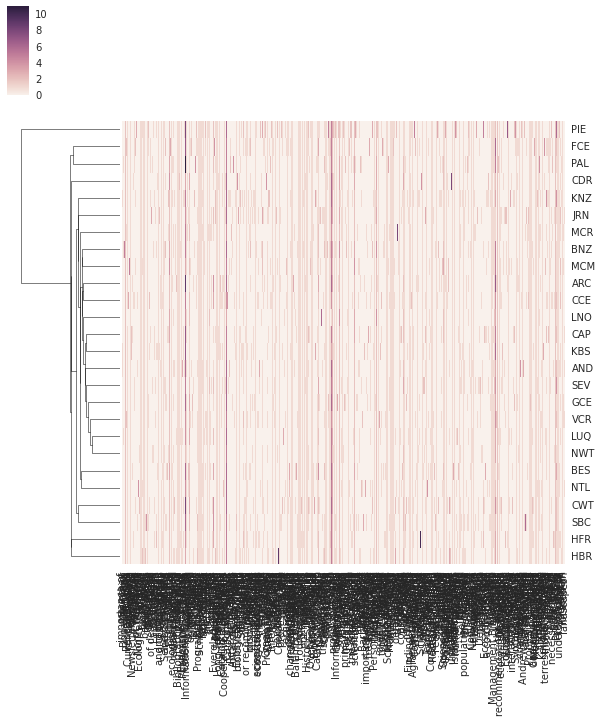

In [90]:
%matplotlib inline
def f(c):
    return df[c].sum() > 2

df = df.select(f, axis=1)

g = sns.clustermap(df, col_cluster=False, col_linkage=False)

In [91]:
df.to_csv('lter-bigrams.csv')

In [92]:
from IPython.display import FileLink
FileLink('lter-bigrams.csv')

/home/gregcaporaso/2015-lter/lter-bigrams.csv